In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import glob, os
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR, SVR
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO
#path = "C:\\Users\\Mohamed\\MS BGD\\fil_rouge_lepoint\\Predictions éléctions\\PRESIDENTIELLES_1965-2012-csv\\" 
#path_to_csv = "C:\\Users\\Mohamed\\git\\Elections\\Analyses\\Jointure des tables\\"
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.linear_model import ElasticNet
from scipy.stats import chi2_contingency, pearsonr, spearmanr

In [2]:
df = pd.read_csv("la_base.csv", encoding="latin1")

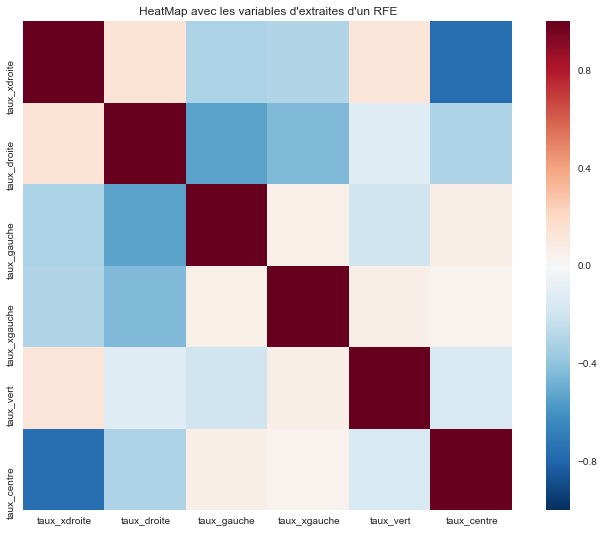

In [182]:
liste_features = ["taux_xdroite", "taux_droite", "taux_gauche", "taux_xgauche", "taux_vert", "taux_centre"]
xdroite_mat = df.ix[:, liste_features].corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
# Draw the heatmap using seaborn
sns.heatmap(xdroite_mat, vmax=1, square=True)
plt.title("HeatMap avec les variables d'extraites d'un RFE")
plt.show()

In [3]:
df.drop("Unnamed: 0", axis=1)

,département,code,Année,taux_Blancs et nuls,taux_xdroite,taux_gauche,taux_Abstention,taux_xgauche,taux_centre,taux_vert,...,pres_xgauche,importations,subventions,conjoncture travaux publics-opinions sur le carnet de commandes,capacité epargne actuelle (augmentation moins diminution),opportunite epargner(favorable moins favorable),capacite epargne future(amélioration moins deterioration),densité_médecins,consommation menages - electricite,nombre de logement vacant
0,AIN,01,1981.0,1.604750,0.000000,27.982284,27.940015,14.888346,31.660729,4.226724,...,0,37565.00,-1797.75,-48.00,8.333333,-31.916667,-18.666667,84.34,21650,NaN
1,AIN,01,1988.0,1.879541,16.041776,31.377812,23.877703,8.171024,21.290640,4.065072,...,0,51173.75,-3613.50,1.00,4.666667,6.333333,-9.833333,108.59,41112,1891.0
2,AIN,01,1995.0,3.155125,19.751523,20.553725,25.807688,11.073277,19.814177,3.932995,...,0,68988.00,-3850.00,-47.25,9.166667,28.500000,-10.166667,127.35,56611,1949.0
3,AIN,01,2002.0,3.540833,25.246258,20.716478,37.217333,11.320086,8.927322,7.374661,...,0,109924.50,-4745.00,-28.00,11.833333,24.750000,-3.250000,127.56,77698,1954.0
4,AIN,01,2007.0,1.344946,12.233715,20.826783,16.571575,6.279643,19.637678,3.020936,...,0,139894.25,-3140.75,27.75,5.250000,25.583333,-8.083333,123.76,95093,2014.0
5,AIN,01,2012.0,2.003682,20.570729,22.782257,20.767797,11.290203,10.186437,2.305201,...,0,149377.00,-4193.25,-13.75,13.083333,27.500000,-3.583333,118.02,98002,2482.0
6,AISNE,02,1981.0,1.679212,0.000000,26.905198,18.325105,25.241915,25.479831,3.213391,...,0,37565.00,-1797.75,-48.00,8.333333,-31.916667,-18.666667,82.97,21650,NaN
7,AISNE,02,1988.0,2.082546,13.408073,39.529372,19.730813,13.242678,13.345308,3.280391,...,0,51173.75,-3613.50,1.00,4.666667,6.333333,-9.833333,117.50,41112,1891.0
8,AISNE,02,1995.0,2.689070,17.680670,24.381534,23.778332,16.708419,15.627209,2.432225,...,0,68988.00,-3850.00,-47.25,9.166667,28.500000,-10.166667,137.49,56611,1949.0
9,AISNE,02,2002.0,3.383034,23.803360,21.275227,36.798460,17.572834,6.224451,5.001886,...,0,109924.50,-4745.00,-28.00,11.833333,24.750000,-3.250000,140.01,77698,1954.0


In [4]:
df_melt = pd.melt(df, id_vars=['département', 'Année'], value_vars=['taux_xdroite', 'taux_gauche', "taux_centre", "taux_droite",\
                                                          "taux_xgauche", "taux_vert"])


In [5]:
temp = df.merge(df_melt, how="left", on=["département", "Année"])
df2 = temp.iloc[temp.groupby(["département", "Année"])["value"].agg(pd.Series.idxmax)]

C:\Users\Mohamed\Anaconda3\lib\site-packages\pandas\indexes\base.py:1434: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
  result = getitem(key)


In [6]:
print(df2.columns)

Index(['Unnamed: 0', 'département', 'code', 'Année', 'taux_Blancs et nuls',
       'taux_xdroite', 'taux_gauche', 'taux_Abstention', 'taux_xgauche',
       'taux_centre', 'taux_vert', 'taux_droite', 'depart_frontalier',
       'depart_OM', 'depart_CORSE', '0-19ans', '20-39ans', '40-59ans',
       '60-74ans', '75+ans', 'Total', 'Naissances domiciliées par département',
       'Nombre total de mariages domiciliés',
       'Décès domiciliés par département', 'Q1_rate', 'Q2_rate', 'Q3_rate',
       'Q4_rate', 'var_chomage_annee', 'taux_chomage',
       'taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_vert_sup_moyenne',
       'taux_xdroite_sup_moyenne', 'taux_xgauche_sup_moyenne',
       'taux_Abstention_sup_moyenne', 'taux_Blancs et nuls_sup_moyenne',
       'Date', 'pop_verts', 'pop_centre', 'pop_droite', 'pop_gauche',
       'pop_xdroite', 'pop_xgauche', 'pop_premier_ministre', 'cohabitation',
       'pop_president', 'droite_au_pouvoir', 'Dis

In [7]:
df2.drop(['Unnamed: 0', 'code', 'département', 'taux_Blancs et nuls', 'taux_xdroite', 'taux_gauche', 'taux_Abstention', 'taux_xgauche',
       'taux_centre', 'taux_vert', 'taux_droite', 'Q1_rate', 'Q2_rate', 'Q3_rate',
       'Q4_rate', "Total", 'depart_OM', "Date","taux_Abstention_sup_moyenne",'depart_CORSE', 'value'], axis=1, inplace=True)

C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [8]:
df2.head()

,Année,depart_frontalier,0-19ans,20-39ans,40-59ans,60-74ans,75+ans,Naissances domiciliées par département,Nombre total de mariages domiciliés,Décès domiciliés par département,...,importations,subventions,conjoncture travaux publics-opinions sur le carnet de commandes,capacité epargne actuelle (augmentation moins diminution),opportunite epargner(favorable moins favorable),capacite epargne future(amélioration moins deterioration),densité_médecins,consommation menages - electricite,nombre de logement vacant,variable
2,1981.0,1,127107.0,29.493565,22.591485,10.852949,5.610693,1.483648,0.556987,0.953632,...,37565.00,-1797.75,-48.00,8.333333,-31.916667,-18.666667,84.34,21650,NaN,taux_centre
7,1988.0,1,135637.0,31.031958,21.864588,10.862187,6.053491,1.364089,0.433998,0.829715,...,51173.75,-3613.50,1.00,4.666667,6.333333,-9.833333,108.59,41112,1891.0,taux_gauche
15,1995.0,1,139286.0,29.565802,24.343205,12.174249,5.556721,1.221864,0.413939,0.796522,...,68988.00,-3850.00,-47.25,9.166667,28.500000,-10.166667,127.35,56611,1949.0,taux_droite
21,2002.0,1,145856.0,27.267392,26.936075,11.789207,6.393283,1.244805,0.453242,0.764112,...,109924.50,-4745.00,-28.00,11.833333,24.750000,-3.250000,127.56,77698,1954.0,taux_droite
27,2007.0,1,152564.0,25.819423,28.353390,11.809119,7.098493,1.275364,0.412888,0.718142,...,139894.25,-3140.75,27.75,5.250000,25.583333,-8.083333,123.76,95093,2014.0,taux_droite


In [9]:
df3 = df2[df2["Année"]!=1981]
df3.ix[df3["Année"]==1988,"pop_verts"] = df3.ix[df3["Année"]==1995,"pop_verts"].iloc[0]


C:\Users\Mohamed\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
df3.head()

,Année,depart_frontalier,0-19ans,20-39ans,40-59ans,60-74ans,75+ans,Naissances domiciliées par département,Nombre total de mariages domiciliés,Décès domiciliés par département,...,importations,subventions,conjoncture travaux publics-opinions sur le carnet de commandes,capacité epargne actuelle (augmentation moins diminution),opportunite epargner(favorable moins favorable),capacite epargne future(amélioration moins deterioration),densité_médecins,consommation menages - electricite,nombre de logement vacant,variable
7,1988.0,1,135637.0,31.031958,21.864588,10.862187,6.053491,1.364089,0.433998,0.829715,...,51173.75,-3613.50,1.00,4.666667,6.333333,-9.833333,108.59,41112,1891.0,taux_gauche
15,1995.0,1,139286.0,29.565802,24.343205,12.174249,5.556721,1.221864,0.413939,0.796522,...,68988.00,-3850.00,-47.25,9.166667,28.500000,-10.166667,127.35,56611,1949.0,taux_droite
21,2002.0,1,145856.0,27.267392,26.936075,11.789207,6.393283,1.244805,0.453242,0.764112,...,109924.50,-4745.00,-28.00,11.833333,24.750000,-3.250000,127.56,77698,1954.0,taux_droite
27,2007.0,1,152564.0,25.819423,28.353390,11.809119,7.098493,1.275364,0.412888,0.718142,...,139894.25,-3140.75,27.75,5.250000,25.583333,-8.083333,123.76,95093,2014.0,taux_droite
33,2012.0,1,159835.0,24.600920,28.013653,13.354487,7.560609,1.203159,0.357056,0.712953,...,149377.00,-4193.25,-13.75,13.083333,27.500000,-3.583333,118.02,98002,2482.0,taux_droite


In [72]:
df_train_x = df3[(df3["Année"]!=2012) & (df3["Année"]!=1981)]
df_train_x = df_train_x.drop("variable", axis=1)
df_train_y = df3[(df3["Année"]!=2012) & (df3["Année"]!=1981)]["variable"]

df_test_x = df3[df3["Année"]==2012]
df_test_x = df_test_x.drop("variable", axis=1)
df_test_y = df3[df3["Année"]==2012]["variable"]


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


ss = StandardScaler()
df_train_x = ss.fit_transform(df_train_x)
df_test_x = ss.transform(df_test_x)


In [178]:

#clf = LogisticRegression(C=1, multi_class='ovr')
#clf = SVC(C=1, kernel='rbf', decision_function_shape='ovo', max_iter=300)
clf = DecisionTreeClassifier(max_depth=16)

clf = RandomForestClassifier(max_depth=15, n_estimators=100)
clf.fit(df_train_x, df_train_y)
clf.score(df_test_x, df_test_y)

0.60416666666666663

In [180]:
clf.feature_importances_ 

array([  4.81704398e-02,   7.61982671e-03,   2.60373247e-02,
         3.33519781e-02,   3.83162937e-02,   2.14703792e-02,
         3.48434069e-02,   2.44945347e-02,   3.28705513e-02,
         1.92249308e-02,   1.35595849e-02,   3.66382506e-02,
         1.49712421e-02,   4.09624825e-02,   3.76641330e-02,
         6.55476454e-03,   9.00544727e-03,   1.07068890e-02,
         1.78452797e-02,   5.65517312e-03,   5.02703856e-03,
         2.76780423e-02,   2.68815447e-02,   2.84133416e-03,
         4.92646254e-02,   6.99181482e-03,   3.25100311e-02,
         3.59466188e-02,   1.11805818e-03,   1.65506607e-02,
         2.51071974e-02,   2.79434973e-02,   2.32061225e-02,
         1.54352171e-03,   6.66644275e-05,   1.92326467e-03,
         2.24259266e-03,   5.37632156e-03,   7.55145690e-03,
         8.60102421e-04,   3.71359787e-02,   2.22970588e-03,
         2.44639279e-03,   3.97966516e-02,   4.46684755e-02,
         6.04691966e-03,   2.42212613e-02,   3.73808222e-02,
         2.54803695e-02]

In [179]:
print(clf.predict(df_test_x), df_test_y)

['taux_droite' 'taux_droite' 'taux_droite' 'taux_droite' 'taux_droite'
 'taux_droite' 'taux_droite' 'taux_gauche' 'taux_droite' 'taux_gauche'
 'taux_droite' 'taux_droite' 'taux_droite' 'taux_droite' 'taux_droite'
 'taux_droite' 'taux_droite' 'taux_droite' 'taux_droite' 'taux_droite'
 'taux_droite' 'taux_gauche' 'taux_droite' 'taux_droite' 'taux_droite'
 'taux_droite' 'taux_droite' 'taux_droite' 'taux_droite' 'taux_droite'
 'taux_droite' 'taux_droite' 'taux_droite' 'taux_droite' 'taux_droite'
 'taux_droite' 'taux_gauche' 'taux_droite' 'taux_droite' 'taux_droite'
 'taux_droite' 'taux_droite' 'taux_droite' 'taux_gauche' 'taux_droite'
 'taux_droite' 'taux_droite' 'taux_droite' 'taux_droite' 'taux_droite'
 'taux_droite' 'taux_gauche' 'taux_droite' 'taux_droite' 'taux_droite'
 'taux_droite' 'taux_droite' 'taux_droite' 'taux_droite' 'taux_droite'
 'taux_droite' 'taux_droite' 'taux_droite' 'taux_droite' 'taux_droite'
 'taux_droite' 'taux_droite' 'taux_gauche' 'taux_droite' 'taux_droite'
 'taux